In [109]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [110]:
df=pd.read_csv("../data/Laptop Price.csv") 
df.head() 

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050 Ti,Linux,2.5kg,52161.120
1,Asus,Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.5kg,14811.840
2,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Linux,2.2kg,14646.672
3,Lenovo,2 in 1 Convertible,14.0,Touchscreen 2560x1440,Intel Core i7 7500U 2.7GHz,16GB,1TB SSD,Intel HD Graphics 620,Windows 10,1.42kg,150462.720
4,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,2.4kg,23976.000


In [111]:
df.shape

(1172, 11)

In [112]:
df.columns #prints all the column names of the dataframe

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172 entries, 0 to 1171
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1172 non-null   object 
 1   TypeName          1172 non-null   object 
 2   Inches            1172 non-null   float64
 3   ScreenResolution  1172 non-null   object 
 4   Cpu               1172 non-null   object 
 5   Ram               1172 non-null   object 
 6   Memory            1172 non-null   object 
 7   Gpu               1172 non-null   object 
 8   OpSys             1172 non-null   object 
 9   Weight            1172 non-null   object 
 10  Price             1172 non-null   float64
dtypes: float64(2), object(9)
memory usage: 100.8+ KB


In [114]:
df.describe() # gives statistical summary of numerical columns #this shows that we have just "Inches" and "price" as numerical columns
#so we should change the type of certain columns to numerical type in data preprocessing step

,Inches,Price
count,1172.00000,1172.000000
mean,15.04343,60081.426123
std,1.41257,37460.969532
min,10.10000,9270.720000
25%,14.00000,32114.520000
50%,15.60000,52161.120000
75%,15.60000,79346.840400
max,17.30000,324954.720000


In [115]:
#check for duplicate rows, if any
df.duplicated().sum()

25

In [116]:
#check for null values in each column
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [117]:
# Separating categorical and numerical values
catvars = df.select_dtypes(include=['object']).columns 
numvars = df.select_dtypes(include = ['int32','int64','float32','float64']).columns
catvars, numvars

(Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
        'Gpu', 'OpSys', 'Weight'],
       dtype='object'),
 Index(['Inches', 'Price'], dtype='object'))

In [118]:
#checking value counts for categorical columns, to see how many unique values are there in each column
df["Company"].value_counts()
df["TypeName"].value_counts()
df["ScreenResolution"].value_counts()
df["Cpu"].value_counts()
df["Ram"].value_counts()
df["Memory"].value_counts()
df["Gpu"].value_counts()
df["OpSys"].value_counts()
df["Weight"].value_counts()
 

Weight
2.2kg     113
2.1kg      53
2.4kg      44
2.5kg      35
2.3kg      34
         ... 
2.72kg      1
1.10kg      1
2.21kg      1
1.55kg      1
2.79kg      1
Name: count, Length: 172, dtype: int64

C:\Users\Anam\AppData\Local\Temp\ipykernel_21760\3052360491.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df["Price"])


<Axes: xlabel='Price', ylabel='Density'>

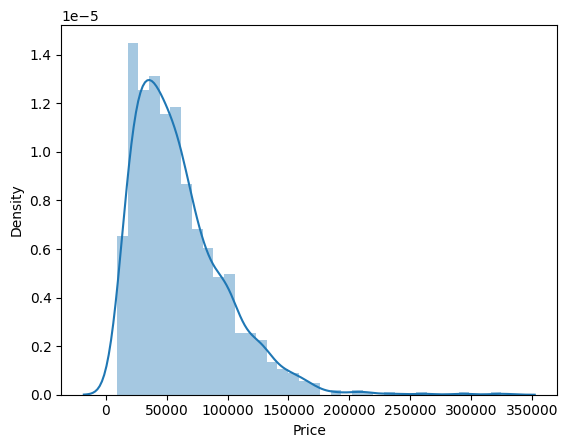

In [ ]:
sn.distplot(df["Price"]) #PRICE DISTRIBUTION PLOT

<Axes: xlabel='Company'>

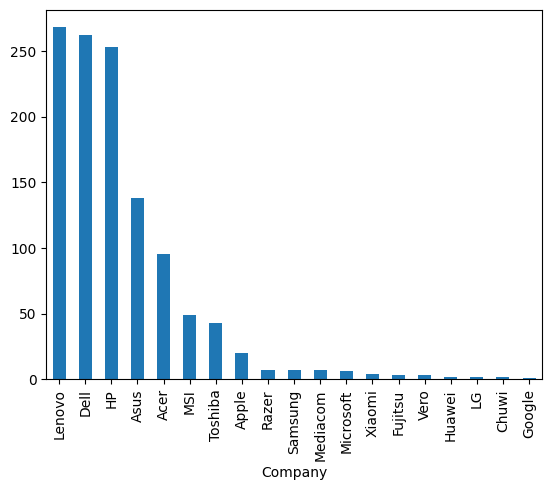

In [120]:
#Plotting the value counts that we checked above for categorical columns
df["Company"].value_counts().plot(kind="bar")

<Axes: xlabel='Ram'>

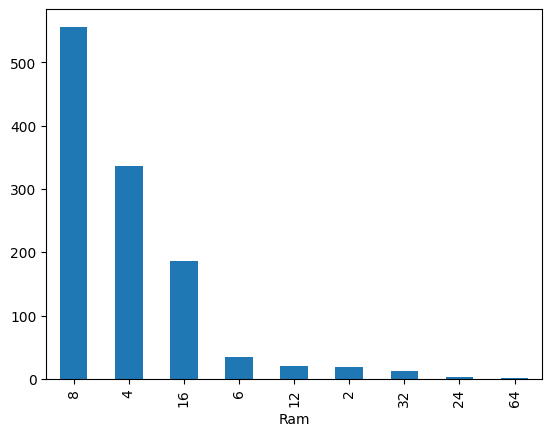

In [190]:
#Plotting the value counts that we checked above for categorical columns
df["Ram"].value_counts().plot(kind="bar")


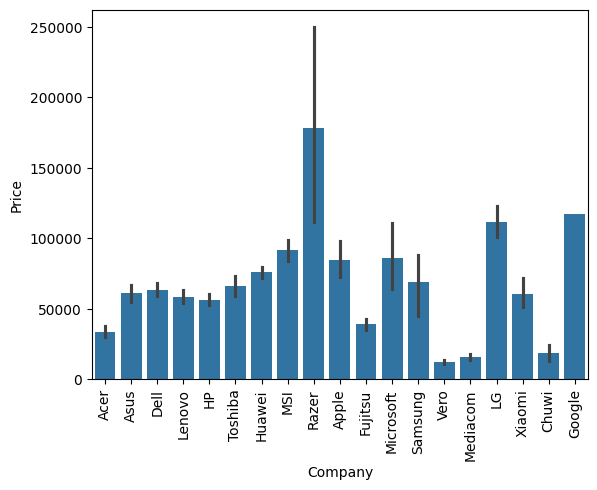

In [121]:
#checking relation between categorical column(Comapny) and target column(Price)
sn.barplot(x=df["Company"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

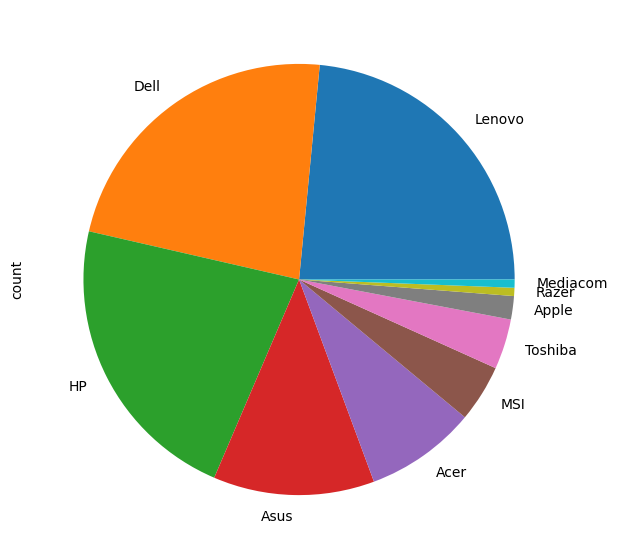

In [194]:
plt.figure(figsize=(10,7))
df['Company'].value_counts().head(10).plot(kind='pie')
plt.show()

<Axes: xlabel='TypeName'>

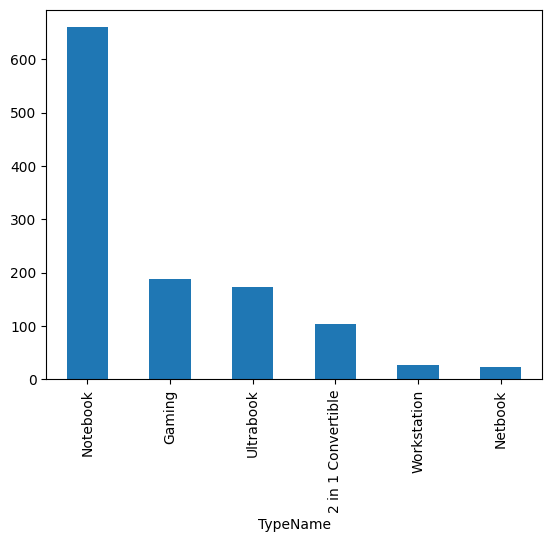

In [122]:
#visualizing the value count of the TypeName column
df["TypeName"].value_counts().plot(kind="bar")

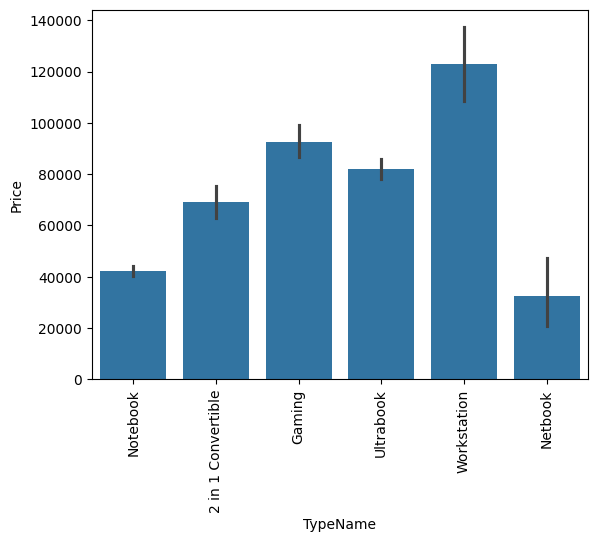

In [123]:
#visualizing the relation between TypeName and Price
sn.barplot(x=df["TypeName"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

C:\Users\Anam\AppData\Local\Temp\ipykernel_21760\463765948.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(x=df["Inches"])


<Axes: ylabel='Density'>

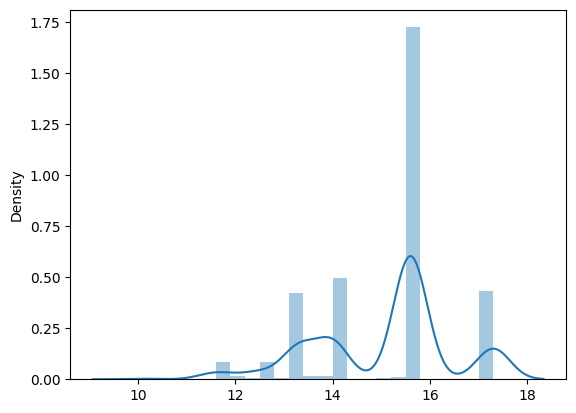

In [124]:
#visualizing the distribution of numerical column-Inches
sn.distplot(x=df["Inches"])

<Axes: xlabel='Inches', ylabel='Price'>

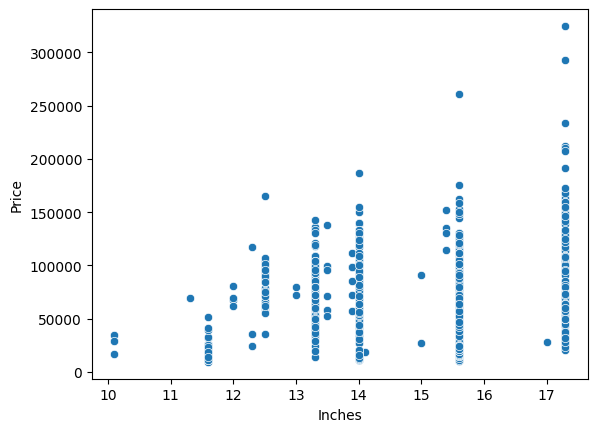

In [125]:
#visualizing the relation between the only 2 numerical columns-Inches and Price
sn.scatterplot(x="Inches",y="Price",data=df)

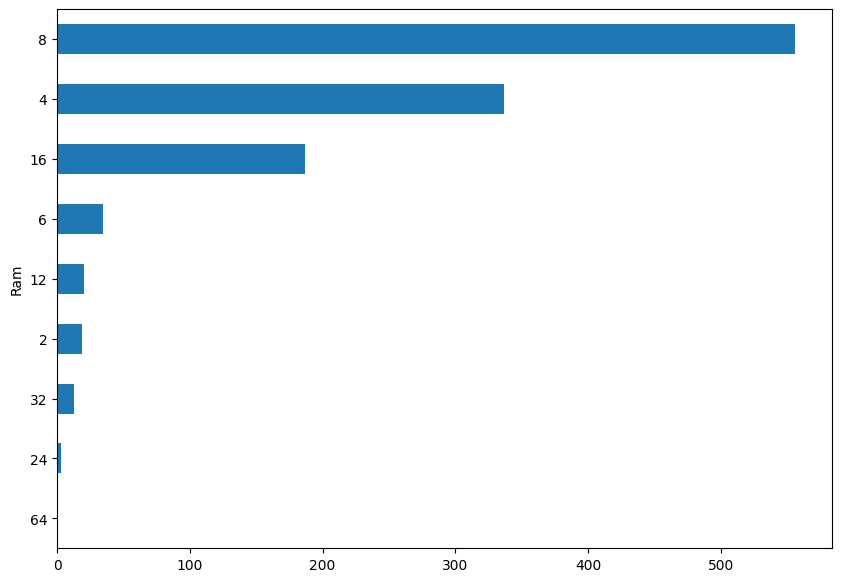

In [196]:
df['Ram'].value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(10,7))
plt.show()

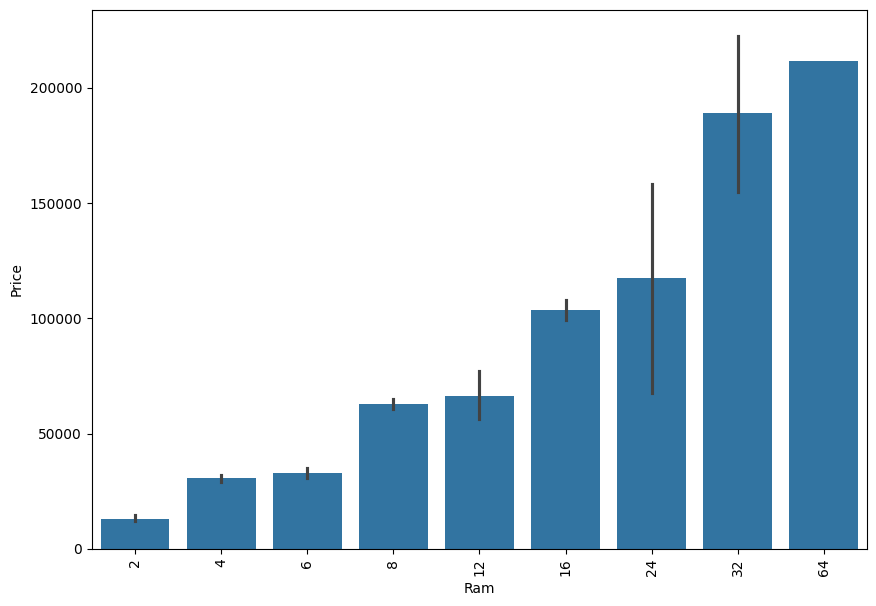

In [197]:
plt.figure(figsize=(10,7))
sn.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [126]:
#majorly all the laptops either have Touchscreen or not (IPS), this we saw while visualizaing it above and checking the value counts for the screenresolution
df["Touchscreen"]=df["ScreenResolution"].apply(lambda x:1 if "Touchscreen" in x else 0)

In [127]:
df.head() #to check if touchscreen column is added or not

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050 Ti,Linux,2.5kg,52161.120,0
1,Asus,Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.5kg,14811.840,0
2,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Linux,2.2kg,14646.672,0
3,Lenovo,2 in 1 Convertible,14.0,Touchscreen 2560x1440,Intel Core i7 7500U 2.7GHz,16GB,1TB SSD,Intel HD Graphics 620,Windows 10,1.42kg,150462.720,1
4,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,2.4kg,23976.000,0


<Axes: xlabel='Touchscreen', ylabel='Price'>

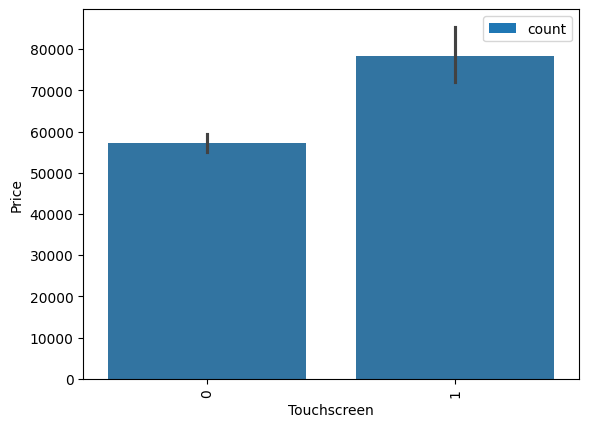

In [128]:
#Let's do deep analysis of ScreenResolution and Price
df["Touchscreen"].value_counts().plot(kind="bar")
sn.barplot(x=df["Touchscreen"],y=df["Price"])

In [129]:
df["Ips"]=df["ScreenResolution"].apply(lambda x:1 if "IPS" in x else 0)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050 Ti,Linux,2.5kg,52161.120,0,0
1,Asus,Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.5kg,14811.840,0,0
2,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Linux,2.2kg,14646.672,0,0
3,Lenovo,2 in 1 Convertible,14.0,Touchscreen 2560x1440,Intel Core i7 7500U 2.7GHz,16GB,1TB SSD,Intel HD Graphics 620,Windows 10,1.42kg,150462.720,1,0
4,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,2.4kg,23976.000,0,0


<Axes: xlabel='Ips', ylabel='Price'>

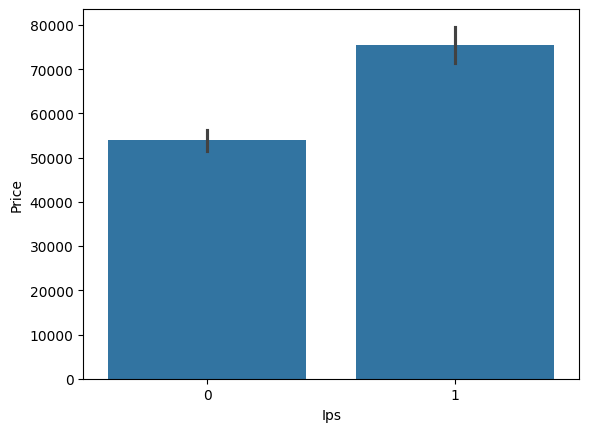

In [130]:

sn.barplot(x=df["Ips"],y=df["Price"])

In [131]:
df["ScreenResolution"].str.split("x")

0           [Full HD 1920, 1080]
1                    [1366, 768]
2                    [1366, 768]
3       [Touchscreen 2560, 1440]
4                    [1366, 768]
                  ...           
1167        [Full HD 1920, 1080]
1168        [Full HD 1920, 1080]
1169                 [1600, 900]
1170        [Full HD 1920, 1080]
1171        [Full HD 1920, 1080]
Name: ScreenResolution, Length: 1172, dtype: object

In [193]:
plt.figure(figsize=(15,7))
sn.heatmap(df.corr(),annot=True,cmap='plasma')
plt.show()

ValueError: could not convert string to float: 'Acer'

<Figure size 1500x700 with 0 Axes>

In [132]:
temp= df["ScreenResolution"].str.split("x",n=1,expand=True)

In [133]:
df["X_res"]=temp[0]
df["Y_res"]=temp[1]

In [134]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050 Ti,Linux,2.5kg,52161.120,0,0,Full HD 1920,1080
1,Asus,Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.5kg,14811.840,0,0,1366,768
2,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Linux,2.2kg,14646.672,0,0,1366,768
3,Lenovo,2 in 1 Convertible,14.0,Touchscreen 2560x1440,Intel Core i7 7500U 2.7GHz,16GB,1TB SSD,Intel HD Graphics 620,Windows 10,1.42kg,150462.720,1,0,Touchscreen 2560,1440
4,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,2.4kg,23976.000,0,0,1366,768


In [135]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [136]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050 Ti,Linux,2.5kg,52161.120,0,0,1920,1080
1,Asus,Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.5kg,14811.840,0,0,1366,768
2,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Linux,2.2kg,14646.672,0,0,1366,768
3,Lenovo,2 in 1 Convertible,14.0,Touchscreen 2560x1440,Intel Core i7 7500U 2.7GHz,16GB,1TB SSD,Intel HD Graphics 620,Windows 10,1.42kg,150462.720,1,0,2560,1440
4,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,2.4kg,23976.000,0,0,1366,768


In [137]:
df["X_res"] = df["X_res"].astype("int")
df["Y_res"] = df["Y_res"].astype("int")

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172 entries, 0 to 1171
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1172 non-null   object 
 1   TypeName          1172 non-null   object 
 2   Inches            1172 non-null   float64
 3   ScreenResolution  1172 non-null   object 
 4   Cpu               1172 non-null   object 
 5   Ram               1172 non-null   object 
 6   Memory            1172 non-null   object 
 7   Gpu               1172 non-null   object 
 8   OpSys             1172 non-null   object 
 9   Weight            1172 non-null   object 
 10  Price             1172 non-null   float64
 11  Touchscreen       1172 non-null   int64  
 12  Ips               1172 non-null   int64  
 13  X_res             1172 non-null   int32  
 14  Y_res             1172 non-null   int32  
dtypes: float64(2), int32(2), int64(2), object(9)
memory usage: 128.3+ KB


In [139]:
df["Ram"]=df["Ram"].str.replace("GB","")
df["Weight"]=df["Weight"].str.replace("kg","")
df["Ram"]=df["Ram"].astype("int")
df["Weight"]=df["Weight"].astype("float")

In [140]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia GeForce GTX 1050 Ti,Linux,2.50,52161.120,0,0,1920,1080
1,Asus,Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.50,14811.840,0,0,1366,768
2,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,500GB HDD,Intel HD Graphics,Linux,2.20,14646.672,0,0,1366,768
3,Lenovo,2 in 1 Convertible,14.0,Touchscreen 2560x1440,Intel Core i7 7500U 2.7GHz,16,1TB SSD,Intel HD Graphics 620,Windows 10,1.42,150462.720,1,0,2560,1440
4,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.40,23976.000,0,0,1366,768


In [141]:
df.select_dtypes(include=[np.number]).corr()['Price']


Inches         0.072210
Ram            0.742514
Weight         0.216858
Price          1.000000
Touchscreen    0.194396
Ips            0.259750
X_res          0.554475
Y_res          0.551422
Name: Price, dtype: float64

In [142]:
 #shift this to preprocessing #drop columns with low correlation with price
df.drop(columns=["ScreenResolution","X_res","Y_res","Inches"],inplace=True)

In [143]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3])) #shift this to preprocessing

In [144]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,Cpu Name
0,Acer,Notebook,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia GeForce GTX 1050 Ti,Linux,2.50,52161.120,0,0,Intel Core i7
1,Asus,Notebook,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.50,14811.840,0,0,Intel Celeron Dual
2,Dell,Notebook,Intel Celeron Dual Core N3060 1.6GHz,4,500GB HDD,Intel HD Graphics,Linux,2.20,14646.672,0,0,Intel Celeron Dual
3,Lenovo,2 in 1 Convertible,Intel Core i7 7500U 2.7GHz,16,1TB SSD,Intel HD Graphics 620,Windows 10,1.42,150462.720,1,0,Intel Core i7
4,Acer,Notebook,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.40,23976.000,0,0,Intel Core i3


In [145]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [146]:

df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

<Axes: xlabel='Cpu brand'>

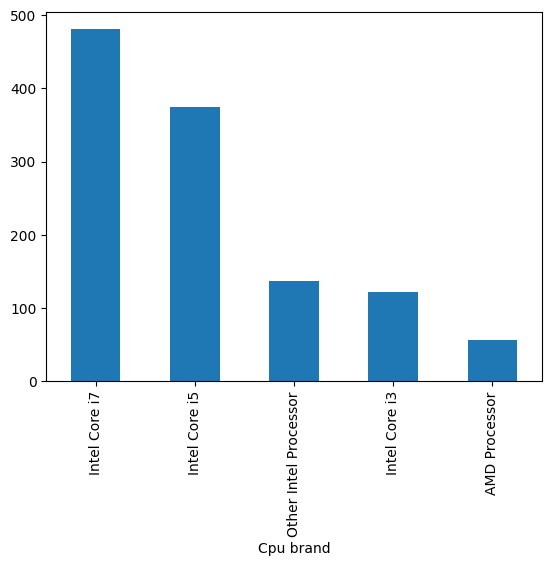

In [147]:
df['Cpu brand'].value_counts().plot(kind='bar')

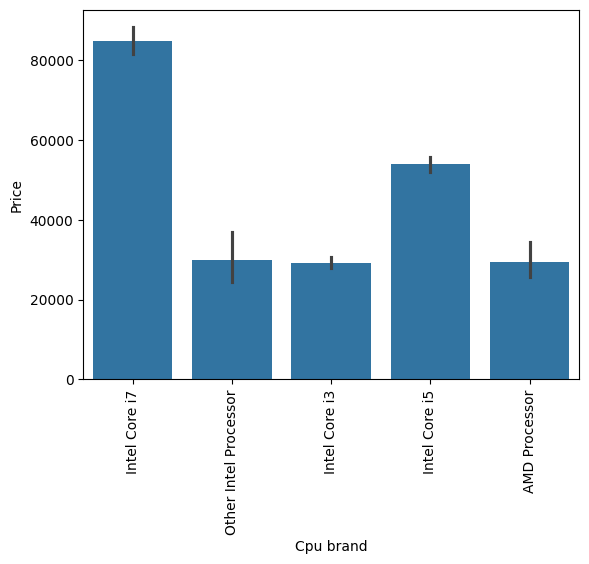

In [148]:
sn.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [149]:

df.drop(columns=['Cpu','Cpu Name'],inplace=True)

<Axes: xlabel='Ram'>

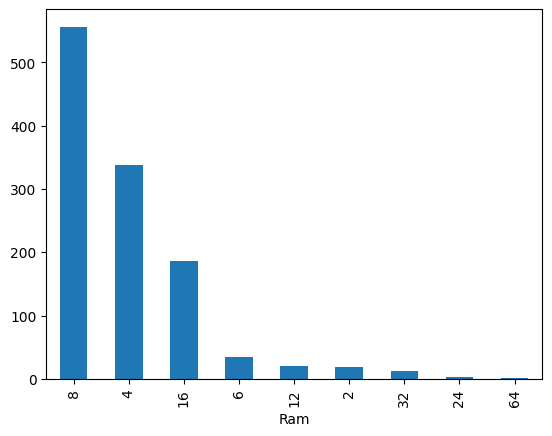

In [150]:
df['Ram'].value_counts().plot(kind='bar')

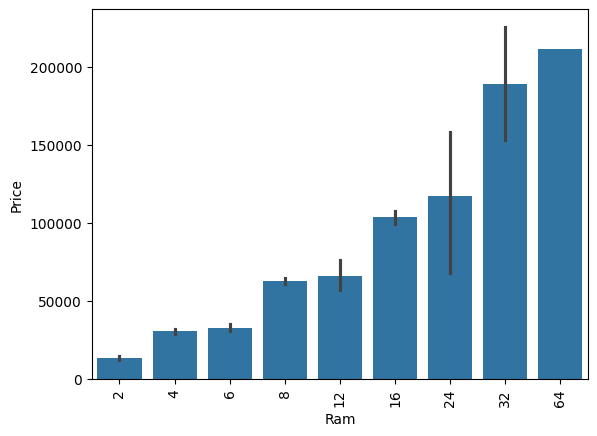

In [151]:
sn.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [152]:
df['Memory'].value_counts()

Memory
256GB SSD                        369
1TB HDD                          197
500GB HDD                        122
512GB SSD                        109
128GB SSD +  1TB HDD              84
128GB SSD                         72
256GB SSD +  1TB HDD              67
32GB Flash Storage                30
1TB SSD                           13
2TB HDD                           13
512GB SSD +  1TB HDD              12
64GB Flash Storage                12
256GB SSD +  2TB HDD              10
256GB Flash Storage                7
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
512GB SSD +  2TB HDD               2
64GB Flash Storage +  1TB HDD      1
1TB SSD +  1TB HDD             

In [158]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620        248
Intel HD Graphics 520        160
Intel UHD Graphics 620        64
Nvidia GeForce GTX 1050       60
Nvidia GeForce GTX 1060       45
                            ... 
Nvidia GeForce 940M            1
AMD Radeon Pro 455             1
Nvidia GeForce GTX1050 Ti      1
AMD Radeon Pro 555             1
Nvidia GeForce GTX 930MX       1
Name: count, Length: 104, dtype: int64

In [160]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [161]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     637
Nvidia    370
AMD       164
ARM         1
Name: count, dtype: int64

In [162]:
df = df[df['Gpu brand'] != 'ARM']

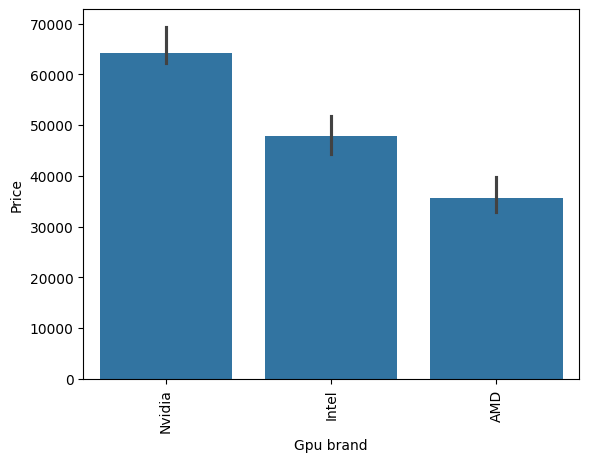

In [163]:
sn.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [164]:
df.drop(columns=['Gpu'],inplace=True)

C:\Users\Anam\AppData\Local\Temp\ipykernel_21760\1111925144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Gpu'],inplace=True)


In [165]:
df['OpSys'].value_counts()

OpSys
Windows 10      961
No OS            61
Linux            55
Windows 7        42
Chrome OS        23
macOS            13
Windows 10 S      7
Mac OS X          7
Android           2
Name: count, dtype: int64

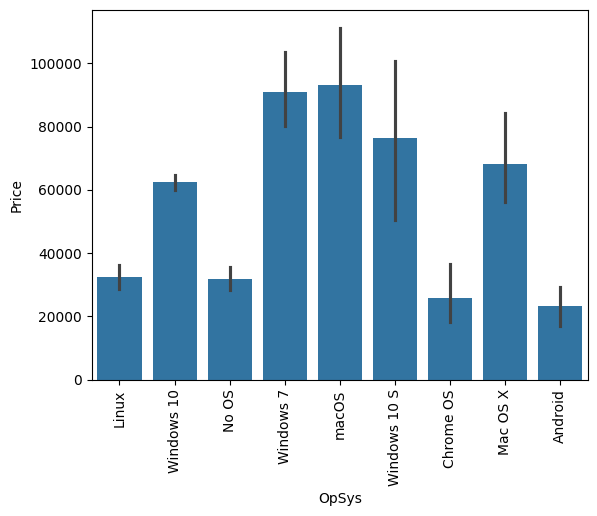

In [166]:
sn.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [167]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [168]:
df['os'] = df['OpSys'].apply(cat_os)

C:\Users\Anam\AppData\Local\Temp\ipykernel_21760\3648919379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['os'] = df['OpSys'].apply(cat_os)


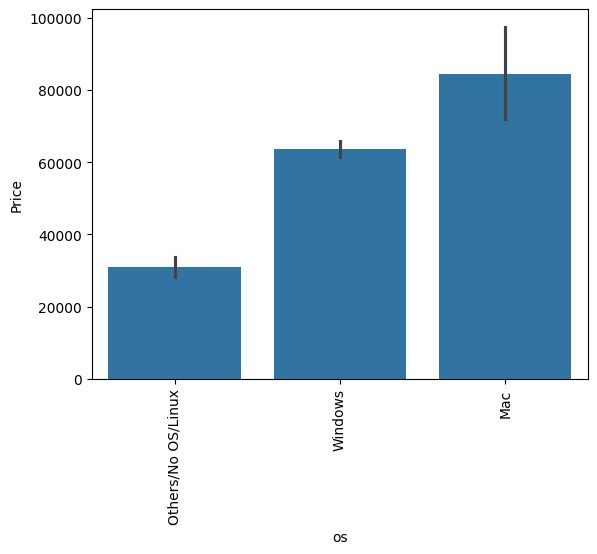

In [169]:

sn.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [170]:
df.drop(columns=['OpSys'],inplace=True)

C:\Users\Anam\AppData\Local\Temp\ipykernel_21760\3105339334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['OpSys'],inplace=True)


C:\Users\Anam\AppData\Local\Temp\ipykernel_21760\572135600.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

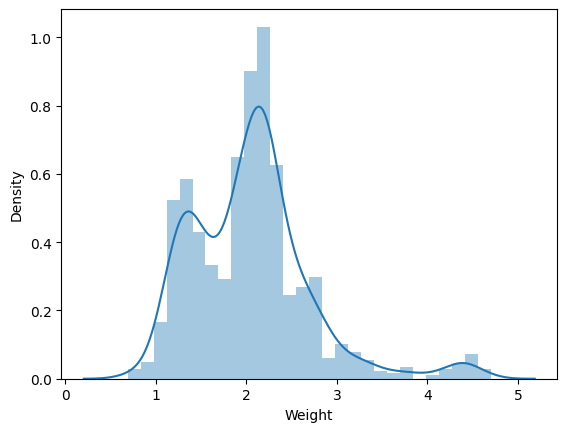

In [171]:
sn.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

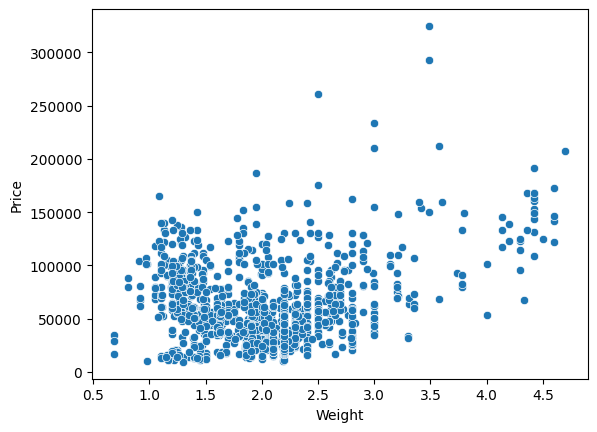

In [174]:
sn.scatterplot(x=df['Weight'],y=df['Price'])

In [178]:
df.select_dtypes(include=[np.number]).corr()['Price']


Ram            0.742399
Weight         0.216297
Price          1.000000
Touchscreen    0.196378
Ips            0.260975
Name: Price, dtype: float64

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1171 entries, 0 to 1171
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1171 non-null   object 
 1   TypeName       1171 non-null   object 
 2   Ram            1171 non-null   int32  
 3   Weight         1171 non-null   float64
 4   Price          1171 non-null   float64
 5   Touchscreen    1171 non-null   int64  
 6   Ips            1171 non-null   int64  
 7   Cpu brand      1171 non-null   object 
 8   HDD            1171 non-null   object 
 9   SSD            1171 non-null   object 
 10  Hybrid         1171 non-null   object 
 11  Flash_Storage  1171 non-null   object 
 12  Gpu brand      1171 non-null   object 
 13  os             1171 non-null   object 
dtypes: float64(2), int32(1), int64(2), object(9)
memory usage: 132.7+ KB


In [180]:
sn.heatmap(df.corr())

ValueError: could not convert string to float: 'Acer'

C:\Users\Anam\AppData\Local\Temp\ipykernel_21760\589762661.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

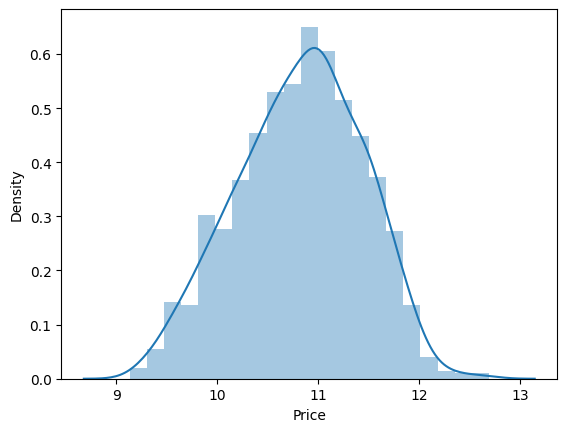

In [181]:
sn.distplot(np.log(df['Price']))